Part b: 

Multiple Linear Regression

Manushri Jayanthi - manushri.jayanthi@gmail.com


Name: Rithvik Rajesh Matta

SRN:PES2UG23CS485

Section:H



**Multiple Linear Regression (MLR) Analysis**

Multiple Linear Regression (MLR) is a statistical method used to model the relationship between one dependent variable and two or more independent variables. It is an extension of simple linear regression that allows for more complex, real-world scenarios where multiple factors influence an outcome.

In this worksheet, you’ll explore air pollution data across multiple U.S. cities and use statistical modeling techniques to understand how different pollutants contribute to overall air quality. The dataset includes concentrations of major pollutants—NO₂, SO₂, O₃, and CO—along with a precomputed Composite Pollution Index that summarizes overall pollution intensity on a given day.
Additionally,these pollutants are measured in different units—some in parts per million (ppm) and others in parts per billion (ppb)—reflecting differences in their typical atmospheric concentrations.

# **Data Understanding & Preprocessing**

Begin by loading the dataset and performing a basic exploration to understand its structure and identify any missing values.

In [2]:
# Load required libraries
library(tidyverse)

# Load dataset
df <- read.csv("/kaggle/input/air-data/UE23CS342AA2_Level1_Dataset2b.csv")

# Basic structure
str(df)

# First few rows
head(df)

# Summary statistics
summary(df)

# Check for missing values
colSums(is.na(df))

# Dimensions
cat("Rows:", nrow(df), " | Columns:", ncol(df), "\n")


'data.frame':	80168 obs. of  21 variables:
 $ State.Code       : int  4 4 4 4 4 4 4 4 4 4 ...
 $ State            : chr  "Arizona" "Arizona" "Arizona" "Arizona" ...
 $ City             : chr  "Phoenix" "Phoenix" "Phoenix" "Phoenix" ...
 $ Date.Local       : chr  "01-01-2010" "01-01-2010" "01-01-2010" "01-01-2010" ...
 $ NO2.Mean         : num  32.4 31.5 33 32.5 35.3 ...
 $ NO2.1st.Max.Value: num  48.4 48.6 48.1 47.7 51 ...
 $ NO2.1st.Max.Hour : int  18 18 18 18 9 9 9 9 19 19 ...
 $ NO2.AQI          : num  45.3 45.2 45.1 44.8 48 ...
 $ O3.Mean          : num  0.013 0.014 0.014 0.013 0.01 0.01 0.01 0.01 0.011 0.012 ...
 $ O3.1st.Max.Value : num  0.034 0.034 0.034 0.034 0.025 0.025 0.025 0.025 0.028 0.028 ...
 $ O3.1st.Max.Hour  : int  10 10 10 10 10 10 10 10 10 10 ...
 $ O3.AQI           : num  30.2 29 28.9 30.1 21.2 ...
 $ SO2.Mean         : num  3.34 3.37 3.35 3.33 4 ...
 $ SO2.1st.Max.Value: num  5.63 6.06 4.75 4.69 6.91 ...
 $ SO2.1st.Max.Hour : int  23 23 2 2 22 22 23 23 20 20 ...
 

,State.Code,State,City,Date.Local,NO2.Mean,NO2.1st.Max.Value,NO2.1st.Max.Hour,NO2.AQI,O3.Mean,O3.1st.Max.Value,⋯,O3.AQI,SO2.Mean,SO2.1st.Max.Value,SO2.1st.Max.Hour,SO2.AQI,CO.Mean,CO.1st.Max.Value,CO.1st.Max.Hour,CO.AQI,Composite_Index
,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,4,Arizona,Phoenix,01-01-2010,32.443,48.377,18,45.281,0.013,0.034,⋯,30.175,3.336,5.635,23,9.306,1.057,2.027,4,NA,2.401217
2,4,Arizona,Phoenix,01-01-2010,31.463,48.605,18,45.243,0.014,0.034,⋯,28.983,3.368,6.060,23,9.494,0.950,1.597,5,18,3.011381
3,4,Arizona,Phoenix,01-01-2010,32.969,48.143,18,45.119,0.014,0.034,⋯,28.938,3.345,4.755,2,NA,1.039,1.978,4,NA,2.449541
4,4,Arizona,Phoenix,01-01-2010,32.452,47.715,18,44.807,0.013,0.034,⋯,30.052,3.328,4.691,2,NA,0.964,1.577,5,18,2.173985
5,4,Arizona,Phoenix,02-01-2010,35.280,50.992,9,47.984,0.010,0.025,⋯,21.196,4.004,6.907,22,9.090,0.983,2.089,22,NA,2.722745
6,4,Arizona,Phoenix,02-01-2010,36.679,51.057,9,48.365,0.010,0.025,⋯,21.095,4.015,6.736,22,10.359,0.941,1.300,3,15,1.699853


   State.Code      State               City            Date.Local       
 Min.   : 4.0   Length:80168       Length:80168       Length:80168      
 1st Qu.: 6.0   Class :character   Class :character   Class :character  
 Median : 6.0   Mode  :character   Mode  :character   Mode  :character  
 Mean   :14.2                                                           
 3rd Qu.:22.0                                                           
 Max.   :41.0                                                           
                                                                        
    NO2.Mean      NO2.1st.Max.Value NO2.1st.Max.Hour    NO2.AQI      
 Min.   : 0.000   Min.   : -2.227   Min.   : 0.00    Min.   : -2.09  
 1st Qu.: 5.309   1st Qu.: 11.669   1st Qu.: 5.00    1st Qu.: 10.57  
 Median : 9.667   Median : 22.198   Median : 9.00    Median : 21.09  
 Mean   :11.664   Mean   : 23.718   Mean   :11.67    Mean   : 22.31  
 3rd Qu.:16.257   3rd Qu.: 34.104   3rd Qu.:20.00    3rd Qu.: 31.9

State.Code             State              City        Date.Local 
                0                 0                 0                 0 
         NO2.Mean NO2.1st.Max.Value  NO2.1st.Max.Hour           NO2.AQI 
                0                 0                 0                 0 
          O3.Mean  O3.1st.Max.Value   O3.1st.Max.Hour            O3.AQI 
                0                 0                 0                 0 
         SO2.Mean SO2.1st.Max.Value  SO2.1st.Max.Hour           SO2.AQI 
                0                 0                 0             40072 
          CO.Mean  CO.1st.Max.Value   CO.1st.Max.Hour            CO.AQI 
                0                 0                 0             40073 
  Composite_Index 
                0

Rows: 80168  | Columns: 21 


Q1)Based on the missing values identified, suggest a strategy to handle them. Before deciding whether to use SO2 AQI and CO AQI in your regression model, examine their correlation with the target variable Composite_Index.

                SO2.AQI CO.AQI Composite_Index
SO2.AQI           1.000  0.184           0.329
CO.AQI            0.184  1.000           0.379
Composite_Index   0.329  0.379           1.000



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




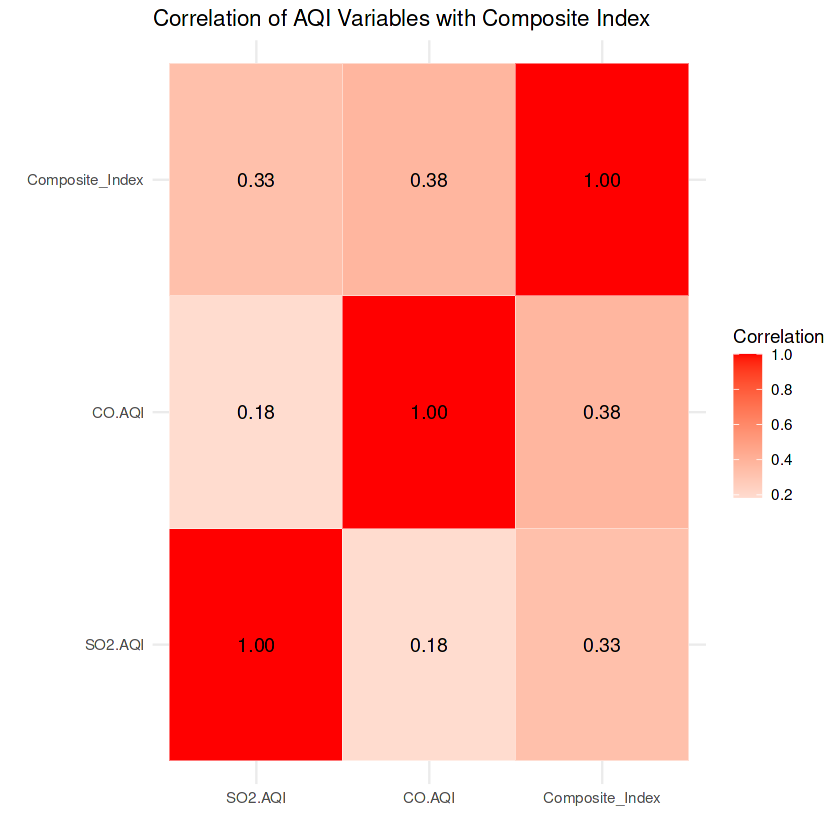

In [3]:
# Compute correlations of SO2.AQI and CO.AQI with Composite_Index
aqi_corr <- cor(df[, c("SO2.AQI", "CO.AQI", "Composite_Index")],
                use = "pairwise.complete.obs")

print(round(aqi_corr, 3))

# Visualize
library(reshape2)
library(ggplot2)

aqi_melt <- melt(aqi_corr)
ggplot(aqi_melt, aes(Var1, Var2, fill = value)) +
  geom_tile(color = "white") +
  geom_text(aes(label = sprintf("%.2f", value)), size = 4) +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0) +
  theme_minimal() +
  labs(title = "Correlation of AQI Variables with Composite Index",
       x = "", y = "", fill = "Correlation")


The dataset shows that both SO₂.AQI and CO.AQI have nearly 50% missing values. To decide whether to keep them, their correlations with the target variable Composite_Index were examined. The results show moderate correlations (SO₂.AQI = 0.33, CO.AQI = 0.38), which are not strong. Given the high percentage of missing values and only moderate predictive power, the most suitable strategy is to drop SO₂.AQI and CO.AQI from the regression model. Instead, we should retain the other pollutant variables (e.g., mean concentrations) that are more complete and likely to contribute more strongly to the model.

# **Standardization & Composite Pollution Index**

Before performing regression, it's important to standardize variables when they are on different scales or units (e.g., parts per billion vs parts per million). This helps ensure that no single variable disproportionately influences the results.

In this analysis, we will mainly focus on the following four pollutants as predictors of pollution severity:

NO₂ Mean

SO₂ Mean

O₃ Mean

CO Mean


2)Standardize the above four columns using z-score normalization.


In [4]:
# Select the four predictor columns
pollutants <- c("NO2.Mean", "SO2.Mean", "O3.Mean", "CO.Mean")

# Standardize using scale() (z-score normalization)
df_std <- as.data.frame(scale(df[pollutants]))

# Add back the target variable (Composite_Index)
df_std$Composite_Index <- df$Composite_Index

# Check summary
summary(df_std)

# First few rows
head(df_std)


    NO2.Mean          SO2.Mean          O3.Mean            CO.Mean       
 Min.   :-1.3543   Min.   :-0.7588   Min.   :-2.60076   Min.   :-1.4696  
 1st Qu.:-0.7379   1st Qu.:-0.6246   1st Qu.:-0.70739   1st Qu.:-0.6455  
 Median :-0.2319   Median :-0.2698   Median : 0.04997   Median :-0.2228  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.: 0.5333   3rd Qu.: 0.1968   3rd Qu.: 0.61798   3rd Qu.: 0.3877  
 Max.   : 5.3330   Max.   :15.8340   Max.   : 4.31006   Max.   :13.8203  
 Composite_Index  
 Min.   :-1.6312  
 1st Qu.: 0.7831  
 Median : 1.2266  
 Mean   : 1.2180  
 3rd Qu.: 1.6575  
 Max.   : 4.2164  

,NO2.Mean,SO2.Mean,O3.Mean,CO.Mean,Composite_Index
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2.412552,1.373529,-1.275397,3.043508,2.401217
2,2.298768,1.393983,-1.180729,2.586647,3.011381
3,2.473623,1.379281,-1.180729,2.966653,2.449541
4,2.413597,1.368415,-1.275397,2.646423,2.173985
5,2.741944,1.800509,-1.559404,2.727548,2.722745
6,2.904376,1.807540,-1.559404,2.548219,1.699853


Conceptual Question: How might different weighting schemes (e.g., giving more weight to NO₂) affect the interpretation of the Composite Pollution Index?

Applying different weighting schemes to the pollutants would change how the Composite Pollution Index is interpreted. Currently, all pollutants contribute equally, but if we assign higher weight to NO₂, then areas with high NO₂ levels will appear more polluted even if other pollutant levels are low. This shifts the index to emphasize the impact of NO₂ over other pollutants.

Heavier weighting increases a pollutant’s influence on the overall index and on any regression models using it, while lighter weighting reduces its influence. Therefore, weighting should be based on scientific or regulatory importance (e.g., health impact or toxicity) to avoid bias and ensure the index accurately reflects true pollution severity.

##  Exploratory Analysis

3)Compute the correlation matrix for the standardized pollutant variables (NO2 Mean, SO2 Mean, O3 Mean, CO Mean).

Based on the results, are any of the predictors highly correlated (e.g., correlation coefficient > 0.8 or < -0.8)?

Discuss how high correlation among predictors can affect your regression model.

         NO2.Mean SO2.Mean O3.Mean CO.Mean
NO2.Mean    1.000    0.324  -0.472   0.609
SO2.Mean    0.324    1.000  -0.112   0.237
O3.Mean    -0.472   -0.112   1.000  -0.323
CO.Mean     0.609    0.237  -0.323   1.000


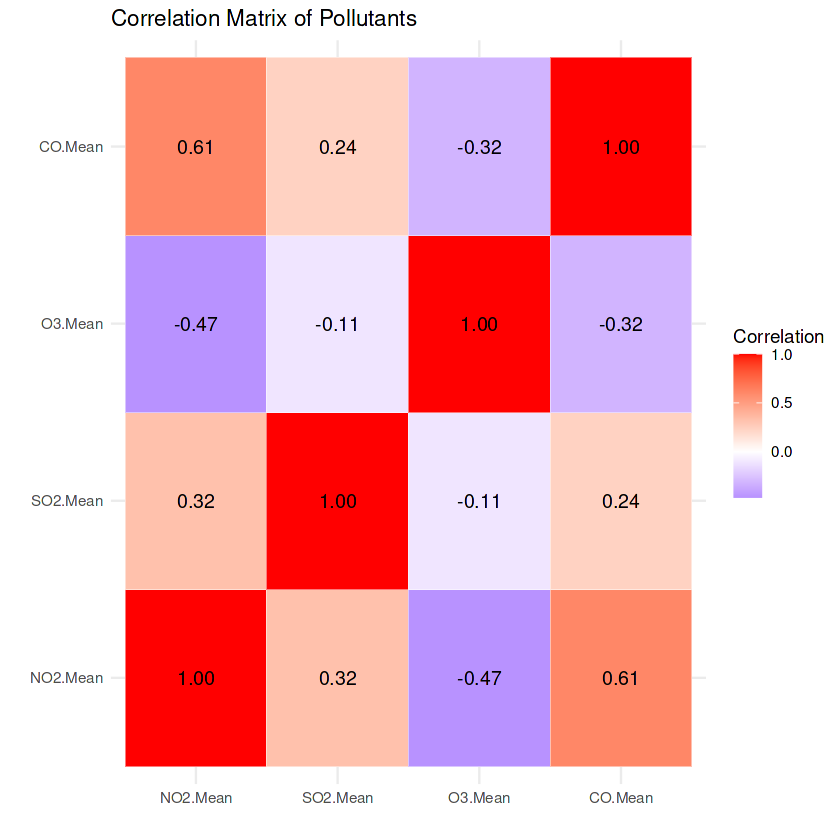

In [5]:
# Compute correlation matrix for the standardized pollutant variables
pollutant_corr <- cor(df_std[, c("NO2.Mean", "SO2.Mean", "O3.Mean", "CO.Mean")])

# Print rounded correlation matrix
print(round(pollutant_corr, 3))

# Optional: Heatmap for visualization
library(reshape2)
corr_melt <- melt(pollutant_corr)
ggplot(corr_melt, aes(Var1, Var2, fill = value)) +
  geom_tile(color = "white") +
  geom_text(aes(label = sprintf("%.2f", value)), size = 4) +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0) +
  theme_minimal() +
  labs(title = "Correlation Matrix of Pollutants",
       x = "", y = "", fill = "Correlation")


The correlation matrix shows the following relationships among the standardized pollutant variables:

* NO₂ Mean and CO Mean: moderately positively correlated (r = 0.609)

* NO₂ Mean and SO₂ Mean: weak positive correlation (r = 0.324)

* NO₂ Mean and O₃ Mean: moderate negative correlation (r = -0.472)

* SO₂ Mean and CO Mean: weak positive correlation (r = 0.237)

* SO₂ Mean and O₃ Mean: very weak negative correlation (r = -0.112)

* O₃ Mean and CO Mean: weak negative correlation (r = -0.323)

None of the pairs show high correlation (|r| > 0.8 or < -0.8).

High correlation among predictors (multicollinearity) can cause problems in a regression model by:


* making it difficult to separate the individual effect of each predictor,
* inflating the standard errors of regression coefficients,
* reducing the statistical significance of predictors, and
* leading to unstable or unreliable coefficient estimates.


Since none of the pollutant predictors are highly correlated, multicollinearity is not a major concern for building the regression model with these variables.

4)While correlation helps spot pairwise relationships, VIF gives a more complete picture of how much each variable is linearly explained by all the others.

(a) Compute the VIF values for the four standardized variables:
NO2 Mean, SO2 Mean, O3 Mean, CO Mean

(b) Do any of the predictors show evidence of multicollinearity (e.g., VIF significantly greater than 5)?

(c) What would it imply for your model if high multicollinearity were present among the predictors?

In [10]:
# Keep only the 4 pollutant columns
df <- df[, c("NO2.Mean", "SO2.Mean", "O3.Mean", "CO.Mean")]

# Convert all to numeric (if needed)
df <- as.data.frame(lapply(df, as.numeric))

# Remove rows with missing values
df <- na.omit(df)

# Function to calculate VIF manually
vif_calc <- function(data, var){
  other_vars <- setdiff(names(data), var)
  f <- as.formula(
    paste(var, "~", paste(other_vars, collapse = " + "))
  )
  r2 <- summary(lm(f, data))$r.squared
  return(1/(1 - r2))
}

# Calculate VIF for each variable
vif_values <- sapply(names(df), function(v) vif_calc(df, v))
vif_values


NO2.Mean SO2.Mean  O3.Mean  CO.Mean 
1.945311 1.123417 1.293747 1.598959

(b) Since all the VIF values are well below 5, none of the predictors show evidence of multicollinearity.

(c) If high multicollinearity were present among the predictors, it would:

* inflate the standard errors of the regression coefficients,

* make the coefficient estimates unstable and highly sensitive to small data changes, and

* make it difficult to assess the individual contribution of each predictor to the model

# **Fit a Multiple Linear Regression Model**







5)Using the standardized predictors (NO2 Mean, SO2 Mean, O3 Mean, CO Mean),
fit a Multiple Linear Regression model to predict the Composite_Index.



In [21]:
# Assuming df_std contains the standardized predictors + Composite_Index
# Columns: NO2.Mean, SO2.Mean, O3.Mean, CO.Mean, Composite_Index

# Fit the MLR model
mlr_model <- lm(Composite_Index ~ NO2.Mean + SO2.Mean + O3.Mean + CO.Mean, data = df_std)

# View summary of the model
summary(mlr_model)



Call:
lm(formula = Composite_Index ~ NO2.Mean + SO2.Mean + O3.Mean + 
    CO.Mean, data = df_std)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.43148 -0.34940  0.00476  0.35418  1.92928 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.217988   0.001862 654.286  < 2e-16 ***
NO2.Mean    0.299542   0.002596 115.368  < 2e-16 ***
SO2.Mean    0.160931   0.001973  81.562  < 2e-16 ***
O3.Mean     0.013235   0.002117   6.251 4.11e-10 ***
CO.Mean     0.018869   0.002354   8.016 1.11e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5271 on 80163 degrees of freedom
Multiple R-squared:  0.3526,	Adjusted R-squared:  0.3526 
F-statistic: 1.092e+04 on 4 and 80163 DF,  p-value: < 2.2e-16


Q6. Report and Interpret R² and Adjusted R²

a) What are the values of R² and Adjusted R² for your model?

b) What do they indicate about your model’s performance?

c) What could cause these values to be high or low?

a) Values from Model

R² = 0.3526 (35.26%)
Adjusted R² = 0.3526 (35.26%)

b) Model Performance Interpretation
R² = 0.3526

 model explains 35.26% of the total variance in the Composite Index
This means that 35.26% of the variation in air quality (as measured by the Composite Index) can be predicted from the four pollutants (NO2, SO2, O3, CO)
The remaining 64.74% is unexplained variance - attributed to other factors not in the model or random error

Adjusted R² = 0.3526

Virtually identical to R² (0.3526 vs 0.3526), indicating:

No overfitting concerns - the model isn't artificially inflated by unnecessary predictors
Appropriate model complexity - the number of predictors (4) is reasonable given the large sample size (80,168)
Genuine predictive relationships - the variables contribute meaningful information



Performance Assessment

Moderate explanatory power - 35.26% is reasonable for environmental data
Statistically robust - highly significant F-statistic (p < 2.2e-16)
Practical significance - captures substantial relationships between pollutants and composite air quality

c) Factors Affecting R² Values
What Could Make R² HIGH (closer to 1.0)?

Complete pollutant coverage

If these four pollutants were the only factors affecting air quality
Perfect linear relationships between predictors and outcome


Additional relevant predictors

Particulate matter (PM2.5, PM10)
Meteorological factors (wind speed, humidity, temperature)
Traffic density, industrial emissions
Seasonal/temporal variables


More homogeneous data

Single geographic region with consistent conditions
Controlled experimental conditions

# **OLS Assumption Checks**

1) Check whether the relationship between the predictors and the target variable is linear. Plot the residuals vs. the fitted values. What do you observe?


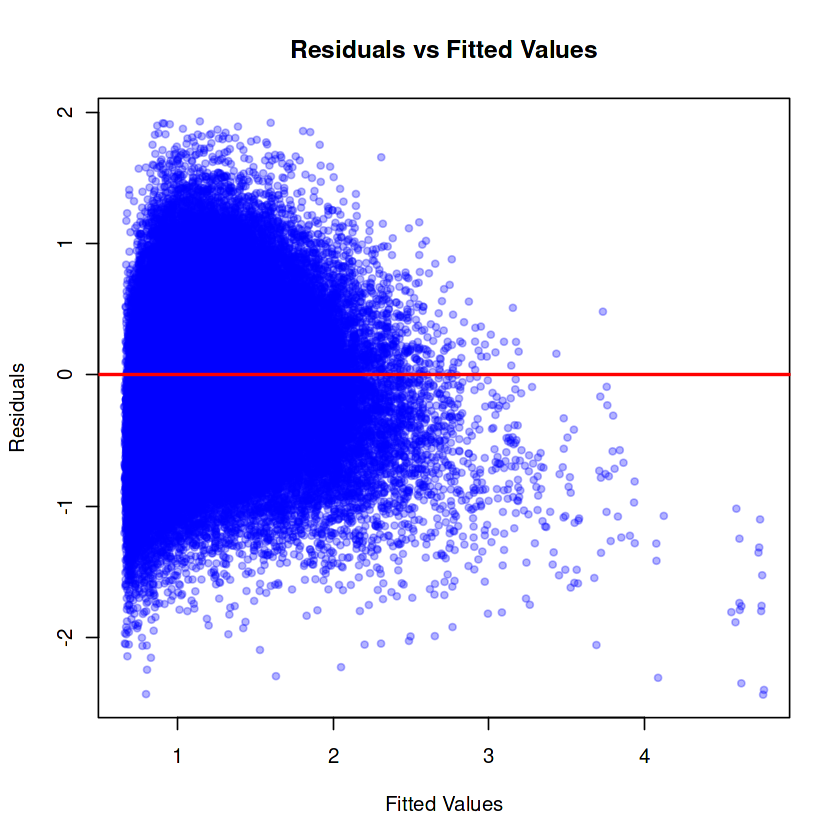

In [30]:

plot(mlr_model$fitted.values, mlr_model$residuals,
     xlab = "Fitted Values",
     ylab = "Residuals",
     main = "Residuals vs Fitted Values",
     pch = 20, col = rgb(0,0,1,0.3))

# Add a horizontal line at 0
abline(h = 0, col = "red", lwd = 2)


2)Are the residuals normally distributed?

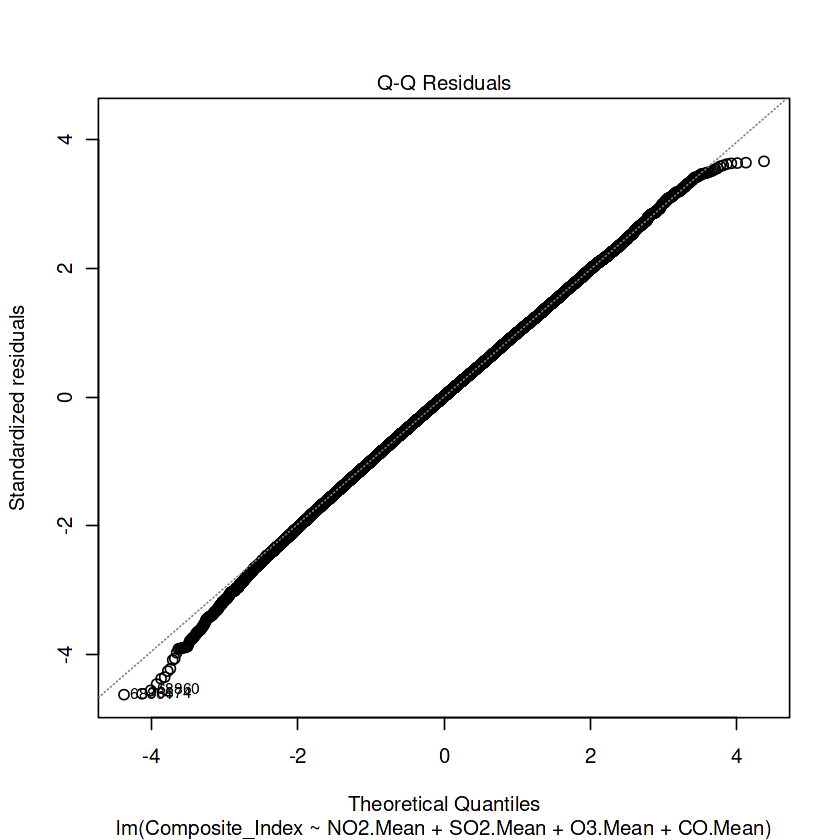

In [31]:
plot(mlr_model,which=2)

If the residuals were perfectly normal, the points on the Q-Q plot would lie exactly on the dashed diagonal line. In the plot above, however, the points deviate noticeably from the line, particularly at the tails. This suggests that the normality assumption of the OLS model is violated, indicating that the model produces more extreme errors than would be expected under a normal distribution.

3)Test for autocorrelation of residuals

In [32]:
durbinWatsonTest(mlr_model)

 lag Autocorrelation D-W Statistic p-value
   1      0.08214553      1.835697       0
 Alternative hypothesis: rho != 0

# **CONCLUSION**

Suggest at least one way the regression model could be improved or extended in future analyses.

A major improvement would be to use a model specifically designed for time-series analysis, such as an ARIMAX model, which incorporates both autoregressive components and exogenous predictors. This would better account for autocorrelation in the residuals and potentially improve forecasting accuracy.